## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, ShuffleSplit
%matplotlib inline

## Load the Data

In the cells below, we load the data, drop the irrelevant columns, and split the data into train and test datasets. The models we formulate will be trained on the just the train set, and then we will compare its predictions on the test set to the actual housing prices.

In [2]:
kc = pd.read_csv('Data/kc_house_data.csv')

kc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
droppable = ['date', 'view', 'sqft_above', 'sqft_basement', 
             'yr_renovated', 'zipcode', 'lat', 'long', 
             'sqft_living15', 'sqft_lot15']

kc = kc.drop(labels=droppable, axis=1)

kc

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


In [4]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


It looks like the grade column could be more useful to our analysis as it has a number associated with the grade of the house. We can break out that number into it's own separate column to see if it is significant.

In [5]:
kc[['numeric_grade', 'grade']] = kc['grade'].str.split(' ', 1, expand=True)
kc['numeric_grade'] = kc['numeric_grade'].astype('int64')

In [6]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  yr_built       21597 non-null  int64  
 11  numeric_grade  21597 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 2.0+ MB


In [7]:
y = kc.price
X = kc.drop('price', axis = 1)

# Traditional train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

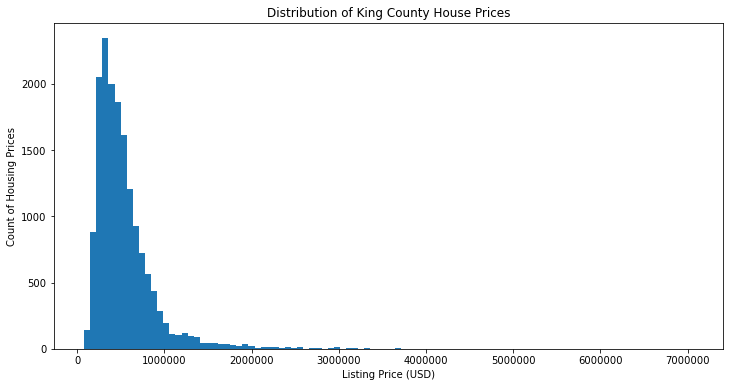

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(y_train, bins=100)
ax.ticklabel_format(useOffset=False, style='plain')
#plt.xticks(rotation = 75)

ax.set_xlabel("Listing Price (USD)")
ax.set_ylabel("Count of Housing Prices")
ax.set_title("Distribution of King County House Prices");

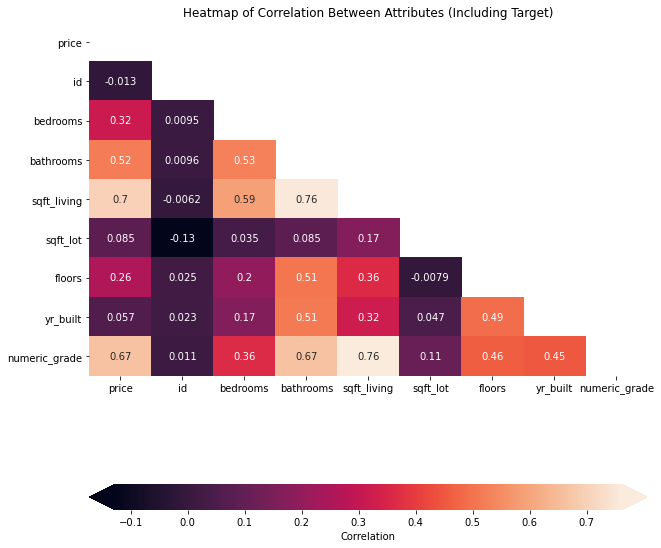

In [9]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Based on the plot above, the feature that is most strongly correlated with the target (price) is the square footage of the living space in the home (sqft_living). Let's create a scatter plot of that feature vs. the listing price.

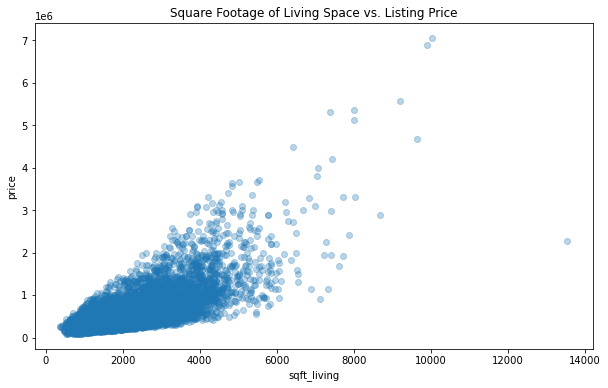

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(X_train['sqft_living'], y_train, alpha=0.3)
ax.set_xlabel('sqft_living')
ax.set_ylabel("price")
ax.set_title("Square Footage of Living Space vs. Listing Price");

Not surprisingly, there appears to be a fairly clear linear relationship between the square footage feature and price of a home in King County. We can use this to make a baseline model without any additional transformations.

## Baseline Model

We will build a linear regression model using just square footage to serve as our baseline model.

In [15]:
baseline_model = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[['sqft_living']],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4922464354169578
Validation score: 0.4861741536590998


Since we are using cross_validate, it defaults to the .score method of the estimator by default, which are r-squared scores. That means that the train score and the validation score represent the amount of variance of the target (price) that is explained by the model's features (currently just the square footage) and parameters (intercept value and coefficient values for the features).

## Build a Model with All Numeric Features

Now that we have a baseline, let's create a more complex model. We are going to use all of the numeric features available to see how this new model performs.

In [16]:
X_train_numeric = X_train.select_dtypes(include='number')

X_train_numeric

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,numeric_grade
19496,2023049361,2,1.00,940,6000,1.0,1954,7
4737,9508850100,3,2.25,2780,31510,2.0,1979,8
268,2557000400,3,2.50,2070,9900,1.0,1979,8
16706,1338800425,6,4.00,5110,7128,2.5,1906,11
2967,8965520100,3,2.25,3440,10628,2.0,1985,10
...,...,...,...,...,...,...,...,...
153,7855801670,4,3.25,5180,19850,2.0,2006,12
866,3955900830,3,2.50,3460,6590,2.0,2001,7
74,3444100400,3,1.75,1790,50529,1.0,1965,7
14512,1930301325,3,2.75,2780,4000,2.0,1904,8


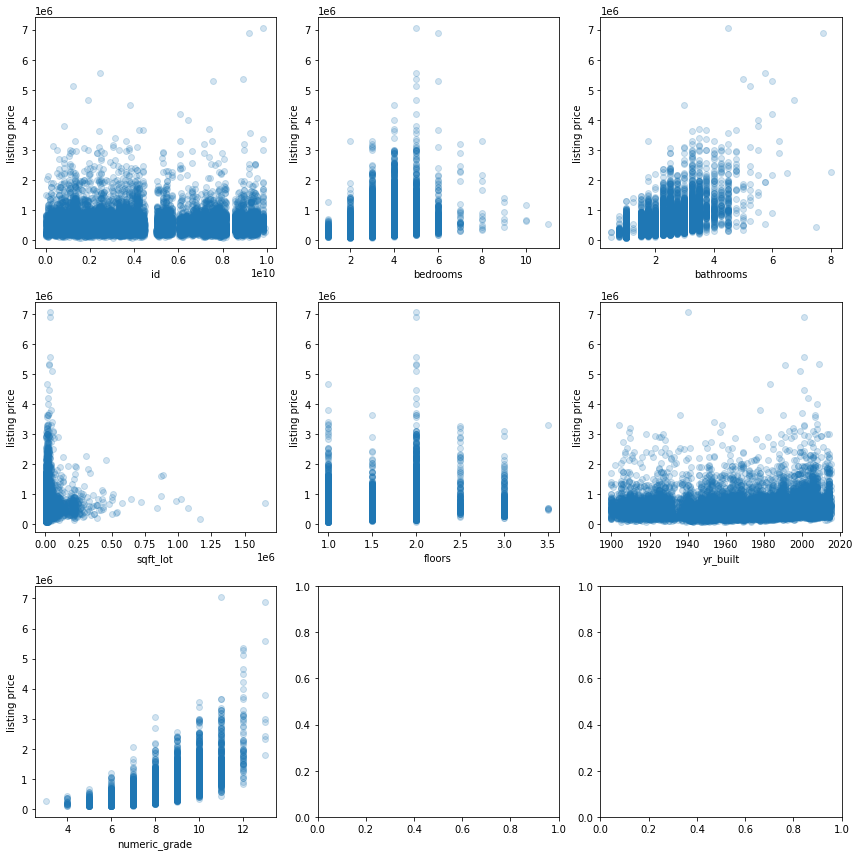

In [23]:
scatterplot_data = X_train_numeric.drop("sqft_living", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 12))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

## Feature Selection Using Domain Understanding

We have a column (id) that is a unique identifier, not an actual numeric feature, so we will have to drop that when creating our second model.

In [24]:
X_train_second_model = X_train_numeric.drop(labels=['id'], axis=1)

X_train_second_model

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,numeric_grade
19496,2,1.00,940,6000,1.0,1954,7
4737,3,2.25,2780,31510,2.0,1979,8
268,3,2.50,2070,9900,1.0,1979,8
16706,6,4.00,5110,7128,2.5,1906,11
2967,3,2.25,3440,10628,2.0,1985,10
...,...,...,...,...,...,...,...
153,4,3.25,5180,19850,2.0,2006,12
866,3,2.50,3460,6590,2.0,2001,7
74,3,1.75,1790,50529,1.0,1965,7
14512,3,2.75,2780,4000,2.0,1904,8


## Build and Evaluate the Second Model

In [25]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6144238579698355
Validation score: 0.6161939949464968

Baseline Model
Train score:      0.4922464354169578
Validation score: 0.4861741536590998


As we can see, we improved pretty significantly from our first model (0.486 to 0.616 r-squared). Additionally, our validation score is in line with our train score, which is a positive sign.

In [1]:
# Test push